In [7]:
%%HTML
Optimization is the problem of finding a set of inputs to an objective function that results in a maximum or minimum function evaluation.

<h3>Gradient Descent</h3>
<a href="https://medium.com/intro-to-artificial-intelligence/gradient-descent-algorithm-explained-with-linear-regression-example-ff6b5491fdb9">Gradient descent optimization explained using linear regression example</a>
The first image below explain the goal of the GD to minimize the cost/loss function by optimising the learning parameters(weights & biases). 
The second & third images explain the importance of right learning rate hyper parameter. 
<img src="images/gd1.jpg" width=400 />
<img src="images/gd2.jpg" width=400 />

In [9]:
%%html 
There is a pitafall in GD where algorithm may fall in local optimum thinking of it's a global optimum.
<img src="images/gd3.jpg" width=400 />


In [25]:
%%html
The gradient is a fancy word for derivative, or the rate of change of a function. 
In a univariate function(i.e. one feature(x) variable and a target(y) variable), it is computed by 
Gradient =  Change in Y/Change in X
 	 	
<img src="images/slope.svg" width=400 />

f(x) (i.e. a function) gives the y, we can say that gradient/derivative, in mathematics, is the rate of change of a function with respect to a variable. 

In higher dimension/ multivariate function, we have more than one variable, we need to compute the partial derivative of f(x) w.r.t each variable.
Then gradient in the higher dimension is a vector of all partial derivatives. 

<br/>
<br/>
Consider the multivariable function f(x, y) = xy²+x³. We can find partial derivatives of the function that is derivatives of function wrt to each variable x and y(a bit of calculus knowledge is required to compute the partial derivatives).
<img src="images/pd1.png" width=400 />
<img src="images/pd2.png" width=400 />
The gradient of f(x) is
<img src="images/gradient_hd.png" width=400 />

In [12]:
%%HTML

<b>Training a model means searching for a combination of model  parameters that minimizes a cost function. It is a search in the model's parameter space.
The more parameters a model has, the more dimensions in this space have, and the harder the search.</b>

In [171]:
%%HTML
<h3> Implementation of simple linear regression</h3>

In [38]:
%%HTML
The linear regression fits the best matching line to the data for the prediction. 
The formula for the line is y= wx+b. here we have one feature x and the outcome is y.
so f(x) = mx+b, basically, here we need to find parameters, w & b, for fitting the line to the data. 
To compute the best parameter, we can check by adding different values to w & b and see the predicted y(y=wx+b) 
is similar to the ground truth.
The checking can be done through a cost function, a simple cost function can be a squared error(i.e. (y^ - y)2). 
If we have m examples, we can take the average of the squared value. J here is the cost function with parameter w & b
<img src="images/cost_lr2.png" width=400 />
In the gradient descent algorithm, we are trying to minimize the cost function by optimising the parameter. 
Each partial derivative(we call it gradient, even though the vector of partial derivatives is gradient) gives the rate of change and direction required to maximise the cost w.r.t the parameter(As the partial derivatives give the +ve direction to maximise). 
In order to compute the minimum, we need to reverse the direction(just hold on to that thought there).
so, adding the current value of the parameter with the gradient of that parameter gives the next parameter value that maximise the cost. 
As we need to go in the reverse direction so instead of adding, we subtract.
<img src="images/cost_lr1.png" width=400 />
Algorithm of gradient descent for LR:
<img src="images/cost_lr3.jpg" width=400 />
The gradient can be computed using the following formula:
<img src="images/cost_lr4.png" width=400 />



In [43]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

In [44]:
housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [45]:
housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [85]:
#For simple linear regression, we only consider one feature
X = housing.data["HouseAge"][:1000]
Y = housing.target[:1000]
X

0      41.0
1      21.0
2      52.0
3      52.0
4      52.0
       ... 
995    11.0
996    25.0
997    22.0
998    17.0
999    12.0
Name: HouseAge, Length: 1000, dtype: float64

In [127]:
def gradient_descent(w, b, X, Y, iterations = 10, learning_rate = 0.001):
    w = 0
    b = 0
    m = X.shape[0]
    # Estimation of optimal parameters 
    for k in range(iterations):
        sum_for_w = 0
        sum_for_b = 0
        # We are computing the gradient w.r.t w & b
        for i in range(m):
            y_pred_i = w*X[i]+b 
            y_gt_i = Y[i]
            sum_for_w += (y_pred_i-y_gt_i)* X[i]
            sum_for_b += (y_pred_i-y_gt_i)
        
        grad_w = sum_for_w/m
        grad_b = sum_for_b/m
        w = w - (learning_rate* grad_w)    
        b = b- (learning_rate * grad_b)

    return w, b



In [128]:
gradient_descent(w,b,X,Y)

(0.04841381460154124, 0.0038357696060325043)

In [119]:
X.to_frame()

,HouseAge
0,41.0
1,21.0
2,52.0
3,52.0
4,52.0
...,...
995,11.0
996,25.0
997,22.0
998,17.0


In [120]:
# Using sklearn

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

linear_reg = LinearRegression()

num_attribs = ["HouseAge"]
cat_attribs = []
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoding", OneHotEncoder(handle_unknown="ignore"))
])
feature_engineering = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

linear_reg  = Pipeline([
    ("feature_engineering", feature_engineering),
    ("model", linear_reg)
])

reg = linear_reg.fit(X.to_frame(),Y) #X.to_frame() it expects a 2d array(n_samples, n_features) that is df not the series(1d array)

In [118]:
reg['model'].coef_
reg['model'].intercept_

2.445421830407677

In [137]:
%%HTML
<h3> Implementation of multivariate linear regression</h3>
Univariate linear regression means we have only one feature in the input, x. 
For instance, the house price prediction example in the previous article had only one feature in x which is the age of the house. 
In the case of multiple linear regression, there could be n number of features. 
For instance, the number of rooms, size of the house etc. 
In other words, we can say each training example will have n number of columns as opposed to a single value for the univariate linear regression.
<br/>
So we can represent the multiple features in a vector.
<img src="images/mult_lr1.png" width=400 />   
So, we can represent the multiple linear regression in the below formula:
<img src="images/mult_lr2.png" width=400 />  
As it is clear from the above picture, there is a vector of weights that need to be computed along with b to solve the problem.
<img src="images/mult_lr3.png" width=400 />  

We can say that there are j number of w and a bias parameters.
<img src="images/mult_lr4.png" width=400 />  

So, now we can expand the above algorithm by filling the gradient with the corresponding equation.
<img src="images/mult_lr5.png" width=400 />  

In [138]:
housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [140]:
X = housing.data[:100]
Y = housing.target[:100]

In [141]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
95,2.0096,36.0,2.294016,1.066294,3469.0,1.493328,37.80,-122.26
96,2.8345,31.0,3.894915,1.127966,2048.0,1.735593,37.82,-122.26
97,2.0062,29.0,3.681319,1.175824,202.0,2.219780,37.81,-122.26
98,1.2185,22.0,2.945600,1.016000,2024.0,1.619200,37.82,-122.26


In [150]:
%%HTML
We can simply calculate the multivariate linear regression using linear Algerbra & Numpy.
<a href="https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression">Based on linear algebra</a>, 
We can compute the weight vector, w using the following equation. Tn the equation beta means w.
<img src="images/mult_lr_4.png" width=400 />

In [151]:
# We can compute the above equation using numpy: https://medium.com/analytics-vidhya/multiple-linear-regression-from-scratch-using-only-numpy-98fc010a1926

def normal_equation(X, Y):
    return np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [152]:
def predict(X_test, w):
    return np.dot(X_test, w) # y= W.X and it's a simple equation without n


In [155]:
W = normal_equation(X, Y) # W vector
predict(X[:1], W)
print(w)

[ 3.36813722e-01 -3.41972170e-03 -1.78045034e-01 -8.37655209e-03
  3.14047110e-05  1.07360358e-01  1.10133347e+01  3.39516108e+00]


In [159]:
# Using sklearn

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

linear_reg = LinearRegression()

num_attribs = X.columns.to_list()
cat_attribs = []
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoding", OneHotEncoder(handle_unknown="ignore"))
])
feature_engineering = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

linear_reg  = Pipeline([
    ("feature_engineering", feature_engineering),
    ("model", linear_reg)
])

reg = linear_reg.fit(X,Y)

In [162]:
reg['model'].coef_

array([ 0.19059518, -0.00455346,  0.08597936, -0.12854725, -0.07961133,
        0.08922712, -0.14322397,  0.57821715])

In [205]:
%%HTML
<h3> Implementation of ploynomial regression</h3>
Not all data can be fit with a line. So we need to add nonlinearity (curvature) to fit the data. Polynomial regression can fit a non-linear (curvature) on data.
The equation of polynomial regression that fits the cubic function on the data with one feature is:
f_w,b(x) = w1x+w2^x2+w3x^3

In [195]:
# We can use the linear regression in the sklearn to implement the polynomial regression. 
# In order to do that, we need to transform the data into polynomial features.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree =3, include_bias=False)),
     ("model", LinearRegression())
])
poly_reg.fit(X, Y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression())])

In [196]:
poly_reg['model'].coef_

array([ 5.63168747e-03,  5.09294363e-02,  4.36225686e-02,  8.51923414e-03,
        1.85154563e-02,  6.93506568e-03, -1.30729803e-03, -1.26615962e-04,
        4.24513619e-02,  2.88485959e-01,  8.06101347e-02,  1.10274891e-02,
        7.32894415e+00,  2.69298218e-02,  1.02108977e-01, -3.53188595e-01,
        2.97870090e+00,  1.30419946e+00,  2.48381800e-01, -1.56089634e+00,
        2.89140055e-01,  9.29674007e-01, -3.11771570e+00,  2.71174000e-01,
        4.96719057e-02,  5.35980828e+00,  1.04776491e-01,  8.24512636e-01,
       -2.66719406e+00,  8.01007938e-03,  1.78437916e+00,  5.35027786e-03,
        1.32580825e-01, -5.25954621e-01, -3.88008156e-02, -4.67449690e+00,
        1.71965476e-02, -9.60968336e-01,  3.00178796e-02,  1.25948247e-01,
       -4.24995153e-01, -4.70031119e-02,  7.82660749e-02,  1.55756447e-02,
        4.06961136e-02, -3.88910832e-02, -9.20892564e-01,  3.14315338e-01,
       -4.45572456e-04,  1.14127372e+00,  4.22934202e+00,  1.28194902e+00,
        1.12898305e-03, -

In [206]:
%%HTML

Polynomial regression captures only a certain amount of curvature. Higher order terms in polynomial regression to get the more amount curavture will result in undesirable result. 
The superioe approach is using splines. The splines are series of polynomial segements strung together, joining knots.

In [207]:
%%html
<h3>Different types of gradient descents</h3>
<h4>Batch gradient descents</h4>
In Batch Gradient Descent, all the training data is taken into consideration to take a single step. 
We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. 
So that’s just one step of gradient descent in one epoch.
<h4>Stochastic Gradient Descent</h4>
n Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. 
Deep learning models crave data. The more the data the more chances of a model to be good. 
Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of 
all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. 
In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step. We do the following steps 
in one epoch for SGD:
<br/>
1. Take an example
    <br/>
    2. Calculate its gradient
<br/>
    3. Use the gradient we calculated in step 3 to update the weights
<br/>
    4. Repeat steps 1–4 for all the examples in the training dataset
<br/>
    <br/>

Since we are considering just one example at a time the cost will fluctuate over the training examples and it will not necessarily decrease. 
    But in the long run, you will see the cost decreasing with fluctuations.

<h4>mini-batch Gradient Descent</h4>
    SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, 
    we cannot implement the vectorized implementation on it. This can slow down the computations.
    To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
    We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw. So, after creating the mini-batches of fixed size, we do the following steps in one epoch:
<br/>
1. Pick a mini-batch
    <br/>
2. Calculate the mean gradient of the mini-batch
    <br/>
3. Use the mean gradient we calculated in step 3 to update the weights
    <br/>
4. Repeat steps 1–4 for the mini-batches we created
    <br/>
    <br/>
Just like SGD, the average cost over the epochs in mini-batch gradient descent fluctuates 
        because we are averaging a small number of examples at a time.

In [2]:
%%html
<h3>Learning curves</h3>

If a model performs well on the training data but generalizes poorly on validation data, then the model is overfitting. 
If it performs poorly on both datasets, then the model is underfitting. This is one way to tell if the model is too simple or complex.
Another way to tell is to look at the learning curves. It plots the model's training and validation error as a function of the training iteration.
<img src="images/lc.jpg" width=400 />

In [3]:
%%html
The above model is underfitting as both training and validation errors are high.

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

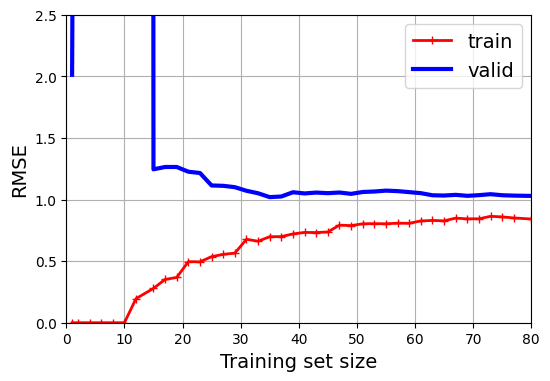

In [10]:
# extra code – generates and saves Figure 4–16
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

In [13]:
%%HTML

In the above graph, the error on the training data is much lower than before. 
It indicates the model's performance is significantly better on training data than the validation data.
<br/>
<b>One way to improve an overfitting model is to feed it more training data until the validation error reaches the training data or use regularization</b>

In [17]:
%%HTML
<h3>Early stopping</h3>

Another way to regularize the iterative learning algorithms such as gd is to stop training once the validation reaches the minimum. 
This is called early stopping.
<img src="images/early_s.jpg" width=400 />


In [15]:
%%HTML
<h3>Bias/Variance trade off</h3>

If the data is too small for the model, it is likely to overfit. Same way if the model has many degree of freedom(model is complex such as high degree polynomial model),
it is likely to have high variance and thus overfit the training data.

<br/>
